# Principal Component Analysis (PCA)

<iframe width="560" height="315" src="https://www.youtube.com/embed/2kQccbySGhY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

[Slides: Principal Component Analysis (PCA)](https://github.com/ichatnun/brainCodeCamp2023_lectures/blob/main/DimensionalityReduction/dim_reduction_part2_pca.pdf)

<br>

ใน tutorial นี้เรามาทดลองใช้เทคนิค principal component analysis (PCA) ในการลดจำนวนมิติของข้อมูลกัน

เราจะเริ่มจากการนำเอาข้อมูลจากตัวอย่างสุดท้ายใน tutorial ที่แล้วมาดู ซึ่งแต่ละจุดข้อมูล $(x,y)$ เป็นข้อมูลใน space ที่มี 2 มิติ (ค่า $x$ เป็นมิติแรก และค่า $y$ เป็นมิติที่สอง) และในชุดข้อมูลนี้มีจุดอยู่ 2 ประเภท (2 classes)


*   class 1: $y = x$ โดยที่ $ -4 ≤ x < 0 $
*   class 2: $y = x$ โดยที่ $ 0 < x ≤ 4 $

ตอนนั้นเราใช้การหมุนจุดข้อมูลตามเข็มนาฬิกาไป $45$ องศา แต่ใน tutorial นี้ นี้เราจะมองอีกมุม กล่าวคือ เราจะไม่หมุนจุดข้อมูล แต่เราจะหมุนแกนทั้งหมดใน space (แกน $x$ และ แกน $y$) ไป $45$ องศาแบบทวนเข็มนาฬิกาแทน

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import colors

import ipywidgets as widgets  # ใช้สำหรับการทำ interactive display

np.random.seed(42) # ตั้งค่า random seed เอาไว้ เพื่อให้การรันโค้ดนี้ได้ผลเหมือนเดิม

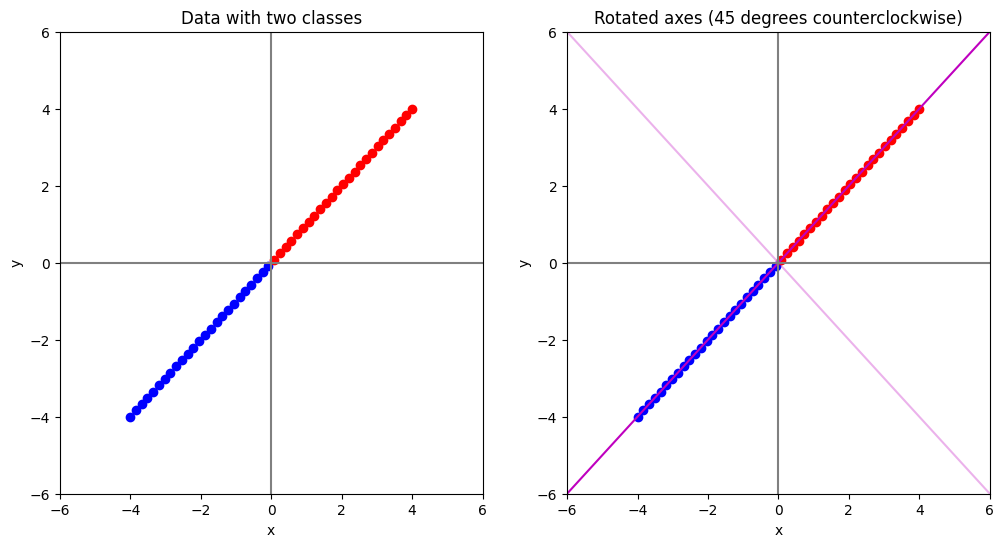

In [2]:
num_points = 50 # จำนวนจุดข้อมูล
x = np.linspace(-4, 4, num_points)
y = x

# นำเอาค่า x มาใส่ใน column แรกของ data matrix และ ค่า y มาใส่ใน column ที่สอง
data = np.zeros((num_points, 2))
data[:, 0] = x
data[:, 1] = y

# เตรียมข้อมูลผลเฉลย โดยกำหนดให้ class 1 แทนด้วยเลข 0 และ class 2 แทนด้วยเลข 1
true_class_labels = data[:, 0] > 0

# เตรียมแสดงผล
x_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ x สำหรับแสดงผล
y_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ y สำหรับแสดงผล


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# แสดงรูปข้อมูลเริ่มต้น
ax[0].scatter(data[data[:, 0] < 0, 0], data[data[:, 0] < 0, 1], c='b') # Plot จุดข้อมูลที่เป็น class 1
ax[0].scatter(data[data[:, 0] > 0, 0], data[data[:, 0] > 0, 1], c='r') # Plot จุดข้อมูลที่เป็น class 2
ax[0].plot([0, 0], y_disp, c="grey") # Plot แกน y
ax[0].plot(x_disp, [0, 0], c="grey") # Plot แกน x
ax[0].set(xlabel="x", ylabel="y")
ax[0].set_title("Data with two classes")


# โชว์แกนใหม่ที่เกิดจากการหมุนแกน x และ แกน y ทวนเข็มนาฬิกาไป 45 องศา
ax[1].scatter(data[data[:, 0] < 0, 0], data[data[:, 0] < 0, 1], c='b') # Plot จุดข้อมูลที่เป็น class 1
ax[1].scatter(data[data[:, 0] > 0, 0], data[data[:, 0] > 0, 1], c='r') # Plot จุดข้อมูลที่เป็น class 2
ax[1].plot([-6, 6], [6, -6], c="m", alpha=0.3) # Plot แกน y ที่ถูกหมุน
ax[1].plot([-6, 6], [-6, 6], c="m", alpha=1) # Plot แกน x ที่ถูกหมุน
ax[1].plot([0, 0], y_disp, c="grey") # Plot แกน y
ax[1].plot(x_disp, [0, 0], c="grey") # Plot แกน x
ax[1].set(xlabel="x", ylabel="y")
ax[1].set_title("Rotated axes (45 degrees counterclockwise)")

plt.setp(ax, xlim=x_disp, ylim=y_disp)
plt.show()

จากภาพด้านบน แกนสีชมพูเข้ม คือแกน $x$ ที่ถูกหมุนไป $45$ องศาแบบทวนเข็มนาฬิกา และแกนสีชมพูที่อ่อนกว่า คือแกน $y$ ที่ถูกหมุนไปด้วยองศาเดียวกัน

จะเห็นได้ว่าข้อมูลจะอยู่บนแกนสีชมพูเข้มทั้งหมด ไม่มีข้อมูลกระจายตัวในแกนสีชมพูอ่อนเลย ซึ่งหมายความว่าเราสามารถลดจำนวนมิติได้โดยการกำจัดแกนสีชมพูอ่อนไป

ในขณะที่ ถ้าเราดูข้อมูลในแกนตั้งต้น (สีเทา) จุดข้อมูลจะกระจายตัวอยู่ระหว่าง 2 แกนเลย ทำให้ไม่สามารถกำจัดแกนใดแกนหนึ่งออกไปได้โดยไม่กระทบต่อคุณภาพของข้อมูล

<br><br>

---

สิ่งที่เทคนิค PCA ใช้ในการลดจำนวนมิติของข้อมูล ก็คือการหาแกนที่เมื่อเราลดมิติของข้อมูลไปบนแกนนั้น (ทางเทคนิคเรียกว่า project ข้อมูลไปบนแกนนั้น) จะพบว่าข้อมูลจะมีการกระจายตัวสูงที่สุด ซึ่งเราวัดการกระจายตัวด้วย variance ของข้อมูลบนแกนนั้น

ก่อนอื่น เราจะมาดู concept ของคำว่า projection กัน โดยเราจะมองจุดข้อมูลของเราเป็นวัตถุ 1 ชิ้น

การ project จุดข้อมูลของเราไปบนแกนอะไร ก็เหมือนกับการที่เราส่องไฟฉายไปที่วัตถุนั้น โดยให้แสงทำมุมตั้งฉากกับแกนนั้น แล้วเงาของวัตถุที่ปรากฎบนแกน ก็คือข้อมูลที่ถูกลดมิติลงนั่นเอง

ดูตัวอย่างจาก code ใน cell ถัดไป ซึ่งใช้จุดสีอ่อน ๆ (ค่า alpha น้อย) แสดงถึงตัวข้อมูลที่ถูก project ไปบนแกนที่เราสนใจ (แสดงด้วยสีชมพูเข้ม)












In [ ]:
# ผู้เรียนไม่ต้องกังวลเกี่ยวกับรายละเอียดของ code ใน cell นี้ ซึ่งจะใช้ในการอธิบาย concept เท่านั้น ไม่ได้คำนึงถึงการเขียนให้ optimize performance

def projection_example():

    num_points_proj_ex = 50 # จำนวนจุดข้อมูล
    x_proj_ex = np.linspace(-4, 4, num_points_proj_ex)
    y_proj_ex = x_proj_ex

    # นำเอาค่า x มาใส่ใน column แรกของ data matrix และ ค่า y มาใส่ใน column ที่สอง
    data_proj_ex = np.zeros((num_points_proj_ex, 2))
    data_proj_ex[:, 0] = x_proj_ex
    data_proj_ex[:, 1] = y_proj_ex

    @widgets.interact(angle_counter_clock_degree=widgets.IntSlider(0, min=0, max=180, description='Angle (deg)'),
                      show_proj_path=widgets.Checkbox(True, description='Show projection path'))
    def plot_rotated_results(angle_counter_clock_degree, show_proj_path):

        # แปลงค่ามุมจากองศามาเป็น radians
        angle_rad = angle_counter_clock_degree*np.pi/180

        # คำนวนค่าความชันของเส้นที่เราจะ project ข้อมูลไปบนนั้น
        slope = np.tan(angle_rad)

        # ทำการ project ข้อมูล
        data_projected_coords = np.expand_dims(data_proj_ex[:,0]*np.cos(angle_rad) + data_proj_ex[:,1]*np.sin(angle_rad), axis=1) * np.expand_dims(np.array([np.cos(angle_rad), np.sin(angle_rad)]), axis=0)

        # สร้าง figure
        fig, ax = plt.subplots(figsize=(6,6))

        # Plot ข้อมูล x, y ที่มีอยู่ด้วยสีน้ำเงิน
        ax.scatter(data_proj_ex[data_proj_ex[:, 0] < 0, 0], data_proj_ex[data_proj_ex[:, 0] < 0, 1], c='b') # Plot จุดข้อมูลที่เป็น class 1
        ax.scatter(data_proj_ex[data_proj_ex[:, 0] > 0, 0], data_proj_ex[data_proj_ex[:, 0] > 0, 1], c='r') # Plot จุดข้อมูลที่เป็น class 2
        ax.plot(x_disp, [slope*x_disp[0], slope*x_disp[1]], c="m", alpha=1) # แสดงรูปเส้นที่เราจะ project ข้อมูลไปบนนั้น
        ax.set(xlabel="x", ylabel="y")
        ax.scatter(data_projected_coords[data_proj_ex[:, 0] < 0, 0], data_projected_coords[data_proj_ex[:, 0] < 0, 1], c='b', alpha=0.3) # Plot จุดข้อมูลที่เป็น class 1
        ax.scatter(data_projected_coords[data_proj_ex[:, 0] > 0, 0], data_projected_coords[data_proj_ex[:, 0] > 0, 1], c='r', alpha=0.3) # Plot จุดข้อมูลที่เป็น class 1

        # ทำการ plot ตัว projection line
        if show_proj_path:
            for idx_pt in range(data_projected_coords.shape[0]):
                ax.plot([data_proj_ex[:, 0], data_projected_coords[:, 0]],[data_proj_ex[:, 1], data_projected_coords[:, 1]], 'gray', alpha=0.01)

        ax.set_title(f"Data rotated by {angle_counter_clock_degree} degrees (counter-clockwise centered at (0,0))")
        plt.setp(ax, xlim=x_disp, ylim=y_disp)
        plt.show()

projection_example()

interactive(children=(IntSlider(value=0, description='Angle (deg)', max=180), Checkbox(value=True, description…

ถ้าหากเราเริ่มต้นด้วยข้อมูลใน space ที่มี 2 มิติ (แกน $x$ และแกน $y$) เทคนิค PCA จะสามารถหาจำนวนแกนใหม่มาได้เท่ากับจำนวนแกนในตอนแรก (2 แกน) เลย โดยที่จะเรียกแกนเหล่านั้นว่า principal component ตัวแรก (PC1) และ ตัวที่สอง (PC2) โดยมีคุณสมบัติที่สำคัญ ดังนี้


*   PC1 จะเป็นแกนที่มีค่า variance ของการกระจายตัวมากกว่าหรือเท่ากับ PC2
*   PC1 จะตั้งฉากกับ PC2
*   ทั้ง PC1 และ PC2 มีขนาดเท่ากับ 1 (เป็น unit vector)

ถ้าหากเราอยากจะลดมิติข้อมูล เราก็แค่เก็บเฉพาะ PC ที่มีค่า variance สูง ๆ

เราจะมาลองทดสอบ PCA กับข้อมูลจากตัวอย่างด้านบน ผ่านการเรียกใช้ `sklearn.decomposition.PCA` กัน

**หมายเหตุ**




1.   เทคนิค PCA เป็นเทคนิคเชิงเส้นประเภท unsupervised learning ซึ่งจะไม่ใช้ข้อมูล class กล่าวคือ PCA จะหาแกนใหม่ ๆ มาโดยที่ไม่รู้ว่าแต่ละจุดข้อมูลเป็นข้อมูลจาก class ไหนเลย ในตัวอย่างด้านบน ซึ่งมี 2 ประเภท (class สีน้ำเงิน และ class สีแดง) เราจะพูดได้ว่า PCA ทำงานโดยไม่สนใจเลยว่าจุดไหนมีสีอะไร เราสามารถมองได้ว่า PCA ทำงานโดยการมองทุกจุดเป็นจุดสีเดียวกันหมด (เช่น มองเป็นสีดำ) ก็ได้
2.   ในหลาย ๆ กรณี ในชุดข้อมูลหลายชุด จะมีข้อมูล class ของแต่ละจุดข้อมูลมาด้วย เวลาเราทำ PCA เราก็จะไม่ใช้ข้อมูล class เหล่านั้น แต่เวลาเราจะ plot ผลหลังการทำ PCA เรามักจะนำเอาข้อมูล class เหล่านั้นมาระบายสีจุดที่ผ่านเทคนิค PCA มาแล้ว เพื่อดูว่าจุดข้อมูลจากแต่ละ class นั้นเรียงตัวกันอยู่ใน space ใหม่ (ที่เกิดจากแกน PC ต่าง ๆ) อย่างไร ซึ่งเราจะมาลองทำแบบนี้กับตัวอย่างสุดท้ายของ tutorial นี้

In [ ]:
# สร้าง PCA สำหรับตัวอย่างนี้เราจะไม่ whiten ข้อมูลของเรา โดยการกำหนด whiten=False แต่ในการใช้งานจริง การทำ whitening เป็นสิ่งที่ค่อนข้างมีความสำคัญมาก
model_PCA = PCA(n_components=2, whiten=False)
model_PCA.fit(data)

# ดึงเอา principal component (pc) ออกมา
pc1 = model_PCA.components_[0]
pc2 = model_PCA.components_[1]

# คำนวณหาความชันของเส้นตรงที่วิ่งผ่านจุด (0,0) และว่ิงไปในทิศทางเดียวกับ principal component -> y = m*x
m_pc1 = pc1[1]/pc1[0]
m_pc2 = pc2[1]/pc2[0]

# คำนวณพิกัดใหม่ของทุกจุดข้อมูล
data_pca = model_PCA.transform(data)

# เตรียมแสดงผล
x_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ x สำหรับแสดงผล
y_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ y สำหรับแสดงผล

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# แสดงรูปข้อมูลเริ่มต้น
ax[0].scatter(data[:, 0], data[:, 1], c='b')
ax[0].plot([0, 0], y_disp, c="grey") # Plot แกน y
ax[0].plot(x_disp, [0, 0], c="grey") # Plot แกน x
ax[0].set(xlabel='x', ylabel='y')
ax[0].set_title("Original data")

# แสดงรูปข้อมูลเริ่มต้นโดยมี principal component ทั้ง 2 อันแสดงอยู่ด้วย
ax[1].scatter(data[:, 0], data[:, 1], c='b')
ax[1].plot(x_disp, [m_pc1*x_disp[0], m_pc1*x_disp[1]], c="m", alpha=1) # แสดง pc1 โดยใช้สมการ y = m1*x
ax[1].plot(x_disp, [m_pc2*x_disp[0], m_pc2*x_disp[1]], c="m", alpha=0.3) # แสดง pc2 โดยใช้สมการ y = m2*x
ax[1].set(xlabel='x', ylabel='y')
ax[1].set_title("Original data with the principal components shown")

# แสดงข้อมูลหลังถูก transform ด้วย PCA (หน้าตาจะเหมือนกับรูปที่แล้ว แต่มีการหมุนแกน)
ax[2].scatter(data_pca[:, 0], data_pca[:, 1], c='b', alpha=1)
ax[2].plot(x_disp, [0, 0], c="m", alpha=1) # แสดงผลโดยการหมุนแกน pc1 ให้มาอยู่ที่ตำแหน่งแกน x
ax[2].plot([0, 0], y_disp, c="m", alpha=0.3) # แสดงผลโดยการหมุนแกน pc2 ให้มาอยู่ที่ตำแหน่งแกน y
ax[2].set(xlabel=f"PC1 score (explained var = {model_PCA.explained_variance_ratio_[0]*100: 0.2f}%)",
          ylabel=f"PC2 score (explained var = {model_PCA.explained_variance_ratio_[1]*100: 0.2f}%)")
ax[2].set_title("PCA-tranformed data")

plt.setp(ax, xlim=x_disp, ylim=y_disp)
plt.show()

ข้อสังเกต


1.   ภาพซ้ายมือสุดแสดงข้อมูลใน space ตั้งต้นที่มี 2 มิติ (แกน $x$ และ แกน $y$) เราสามารถ represent แต่ละจุดข้อมูลด้วยตัวเลข 2 ตัวในรูปแบบ $(x,y)$ โดยที่ $x$ เป็นค่าของจุดข้อมูลถ้าเรา project ข้อมูลลงไปบนแกน $x$ และ $y$ เป็นค่าของจุดข้อมูลถ้าเรา project ข้อมูลลงไปบนแกน $y$ จะเห็นได้ว่าในที่นี้เกือบทุกจุดข้อมูลมีค่า $x$ และ ค่า $y$ ไม่เป็น $0$

2.  ภาพกลางแสดงข้อมูลใน space 2 มิติ เหมือนในภาพซ้ายมือ แต่เราจะแสดงข้อมูลแกนที่เทคนิค PCA หามา ประกอบด้วย PC1 (สีชมพูเข้ม) และ PC2 (สีชมพูอ่อน) แทนแกน $x$ และ แกน $y$ เก่า

3. ภาพขวาสุด เหมือนกับภาพกลาง เพียงแต่เราหมุนรูปให้ PC1 มาแทนที่แกน $x$ เก่า เพื่อให้เรามองและตีความอ่านภาพได้ง่ายขึ้น (ภาพขวาสุดจะเป็นผลที่ได้จากการเอียงศีรษะดูภาพกลาง) ในภาพนี้เราสามารถ represent แต่ละจุดข้อมูลด้วยตัวเลข 2 ตัวในรูปแบบ (PC1 score, PC2 score) โดยที่ PC1 score เป็นค่าของจุดข้อมูลถ้าเรา project ข้อมูลลงไปบนแกน PC1 และ PC2 score เป็นค่าของจุดข้อมูลถ้าเรา project ข้อมูลลงไปบนแกน PC2 จะเห็นได้ว่าในที่นี้ทุกจุดข้อมูลมีค่า PC2 score เป็นศูนย์ ในที่นี้ เราสามารถกำจัด PC2 ออกไปได้โดยที่เราไม่เสียข้อมูล ซึ่งแปลว่าเราจะ represent จุดข้อมูลแต่ละจุดด้วยตัวเลขตัวเดียว ที่มีค่าเท่ากับ PC1 score

เราสามารถเรียกดู attribute ที่ชื่อว่า `explained_variance_ratio_` มาดูว่าแต่ละ PC ที่ PCA หามา มันอธิบาย variance ในข้อมูลเราได้กี่เปอร์เซนต์

In [ ]:
print(f"% variance captured by PC1 = {model_PCA.explained_variance_ratio_[0]*100: 0.2f}")
print(f"% variance captured by PC2 = {model_PCA.explained_variance_ratio_[1]*100: 0.2f}")

จะเห็นว่า PC1 สามารถอธิบาย variance ในข้อมูลได้ 100% ซึ่งก็ตรงกับภาพด้านบนที่เราพบว่าข้อมูลเรากระจายตัวกันอยู่บน PC1 ในขณะที่ไม่มีข้อมูลกระจายตัวอยู่ในทิศทาง PC2 เลย (อธิบาย variance 0%)

---
ในตัวอย่างถัดไป เรามาลองใช้ PCA กับข้อมูลมีการกระจายตัวเป็นวงรีกัน

In [ ]:
num_points = 200

# สร้างจุดขึ้นมาเป็นจำนวน num_points จุด ซึ่งมาจาก multi-variate normal distribution
data = multivariate_normal(mean=[0, 0], cov=[[3, 1], [1, 1]], size=num_points)

# สร้าง PCA สำหรับตัวอย่างนี้เราจะไม่ whiten ข้อมูลของเรา โดยการกำหนด whiten=False แต่ในการใช้งานจริง การทำ whitening เป็นสิ่งที่ค่อนข้างมีความสำคัญมาก
model_PCA = PCA(n_components=2, whiten=False)
model_PCA.fit(data)

# ดึงเอา principal component (pc) ออกมา
pc1 = model_PCA.components_[0]
pc2 = model_PCA.components_[1]

# คำนวณหาความชันของเส้นตรงที่วิ่งผ่านจุด (0,0) และว่ิงไปในทิศทางเดียวกับ principal component -> y = m*x
m_pc1 = pc1[1]/pc1[0]
m_pc2 = pc2[1]/pc2[0]

# คำนวณพิกัดใหม่ของทุกจุดข้อมูล
data_pca = model_PCA.transform(data)

# เตรียมแสดงผล
x_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ x สำหรับแสดงผล
y_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ y สำหรับแสดงผล

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# แสดงรูปข้อมูลเริ่มต้น
ax[0].scatter(data[:, 0], data[:, 1], c='b')
ax[0].plot([0, 0], y_disp, c="grey") # Plot แกน y
ax[0].plot(x_disp, [0, 0], c="grey") # Plot แกน x
ax[0].set(xlabel='x', ylabel='y')
ax[0].set_title("Original data")

# แสดงรูปข้อมูลเริ่มต้นโดยมี principal component ทั้ง 2 อันแสดงอยู่ด้วย
ax[1].scatter(data[:, 0], data[:, 1], c='b')
ax[1].plot(x_disp, [m_pc1*x_disp[0], m_pc1*x_disp[1]], c="m", alpha=1) # แสดง pc1 โดยใช้สมการ y = m1*x
ax[1].plot(x_disp, [m_pc2*x_disp[0], m_pc2*x_disp[1]], c="m", alpha=0.3) # แสดง pc2 โดยใช้สมการ y = m2*x
ax[1].set(xlabel='x', ylabel='y')
ax[1].set_title("Original data with the principal components shown")

# แสดงข้อมูลหลังถูก transform ด้วย PCA (หน้าตาจะเหมือนกับรูปที่แล้ว แต่มีการหมุนแกน)
ax[2].scatter(data_pca[:, 0], data_pca[:, 1], c='b')
ax[2].plot(x_disp, [0, 0], c="m", alpha=1) # แสดงผลโดยการหมุนแกน pc1 ให้มาอยู่ที่ตำแหน่งแกน x
ax[2].plot([0, 0], y_disp, c="m", alpha=0.3) # แสดงผลโดยการหมุนแกน pc2 ให้มาอยู่ที่ตำแหน่งแกน y
ax[2].set(xlabel=f"PC1 score (explained var = {model_PCA.explained_variance_ratio_[0]*100: 0.2f}%)",
          ylabel=f"PC2 score (explained var = {model_PCA.explained_variance_ratio_[1]*100: 0.2f}%)")
ax[2].set_title("PCA-tranformed data")

plt.setp(ax, xlim=x_disp, ylim=y_disp)
plt.show()


# Plot ข้อมูลที่ลดมิติโดยการตัดแกน PC2 ทิ้งไป
plt.figure(figsize=(4, 0.5))
plt.scatter(data_pca[:, 0], np.zeros_like(data_pca[:, 0]), c='b')
ax[2].plot(x_disp, [0, 0], c="m", alpha=1) # แสดงผลโดยการหมุนแกน pc1 ให้มาอยู่ที่ตำแหน่งแกน x
plt.xlim(x_disp)
plt.ylim(-0.5, 0.5)
plt.title("Data in the resulting 1-dimensional space")
plt.yticks([])
plt.show()

print(f"% variance captured by PC1 = {model_PCA.explained_variance_ratio_[0]*100: 0.2f}")
print(f"% variance captured by PC2 = {model_PCA.explained_variance_ratio_[1]*100: 0.2f}")

จะเห็นได้ว่าในตัวอย่างนี้เทคนิค PCA หาแกน PC1 ซึ่งเป็นแกนที่สามารถอธิบาย variance ในข้อมูลได้สูงที่สุด (มากกว่า 80%) และหาแกน PC2 ที่เป็นแกนที่ตั้งฉากกับ PC1 โดยที่สามารถอธิบาย variance ในข้อมูลได้น้อยกว่าแกน PC1 ซึ่งถ้าเอาสองแกนนี้รวมกันก็จะสามารถอธิบาย variance ข้อมูลได้รวมกัน 100%

ถ้าเราต้องการลดมิติลงโดยการเลือกตัดแกนใดแกนหนึ่งทิ้ง เราอาจจะตัดแกน PC2 ทิ้งไป เนื่องจากอธิบาย variance ได้น้อยกว่าก็ได้

<br><br>

---

เรามาดูตัวอย่างสุดท้ายของ part นี้กัน ในตัวอย่างนี้เราจะลองใช้ PCA กับข้อมูลที่มาจากสอง classes ตามโค้ดด้านล่าง


In [ ]:
num_points = 100

# สร้างจุดขึ้นมาเป็นจำนวน num_points จุด ซึ่งมาจาก multi-variate normal distribution สำหรับ class 1
data_class1 = multivariate_normal(mean=[-2, -2], cov=[[1.5, 1], [1, 1]], size=num_points)

# สร้างจุดขึ้นมาเป็นจำนวน num_points จุด ซึ่งมาจาก multi-variate normal distribution สำหรับ class 2
data_class2 = multivariate_normal(mean=[2, 2], cov=[[1.5, 1], [1, 1]], size=num_points)

# รวมข้อมูลจากทั้ง 2 class มาเก็บไว้ในตัวแปร data และเก็บ label (class) เอาไว้ในตัวแปรชื่อ labels
data = np.concatenate((data_class1, data_class2), axis=0)
labels = np.zeros(num_points*2, )
labels[num_points:] = 1

# สร้าง PCA สำหรับตัวอย่างนี้เราจะไม่ whiten ข้อมูลของเรา โดยการกำหนด whiten=False แต่ในการใช้งานจริง การทำ whitening เป็นสิ่งที่ค่อนข้างมีความสำคัญมาก
model_PCA = PCA(n_components=2, whiten=False)

# การทำ PCA เราไม่ใช้ข้อมูลว่าจุดข้อมูลไหนมาจาก class ไหนเลย (หรืออาจมองว่า PCA มองทุกจุดเป็นสีเดียวกันก็ได้)
model_PCA.fit(data)

# ดึงเอา principal component (pc) ออกมา
pc1 = model_PCA.components_[0]
pc2 = model_PCA.components_[1]

# คำนวณหาความชันของเส้นตรงที่วิ่งผ่านจุด (0,0) และว่ิงไปในทิศทางเดียวกับ principal component -> y = m*x
m_pc1 = pc1[1]/pc1[0]
m_pc2 = pc2[1]/pc2[0]

# คำนวณพิกัดใหม่ของทุกจุดข้อมูล
data_pca = model_PCA.transform(data)

# เตรียมแสดงผล
x_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ x สำหรับแสดงผล
y_disp = [-6.0, 6.0] # ค่าต่ำสูงและสูงสุดของ y สำหรับแสดงผล

# ใช้สีน้ำเงินสำหรับแสดงจุดข้อมูลที่มาจาก class 1 (label=0) และใช้สีแดงสำหรับแสดงจุดข้อมูลที่มาจาก class 2 (label=1)
cmap = colors.ListedColormap(["blue","red"])

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# แสดงรูปข้อมูลเริ่มต้น
ax[0].scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
ax[0].plot([0, 0], y_disp, c="grey") # Plot แกน y
ax[0].plot(x_disp, [0, 0], c="grey") # Plot แกน x
ax[0].set(xlabel='x', ylabel='y')
ax[0].set_title("Original data")

# แสดงรูปข้อมูลเริ่มต้นโดยมี principal component ทั้ง 2 อันแสดงอยู่ด้วย
ax[1].scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
ax[1].plot(x_disp, [m_pc1*x_disp[0], m_pc1*x_disp[1]], c="m", alpha=1) # แสดง pc1 โดยใช้สมการ y = m1*x
ax[1].plot(x_disp, [m_pc2*x_disp[0], m_pc2*x_disp[1]], c="m", alpha=0.3) # แสดง pc2 โดยใช้สมการ y = m2*x
ax[1].set(xlabel='x', ylabel='y')
ax[1].set_title("Original data with the principal components shown")

# แสดงข้อมูลหลังถูก transform ด้วย PCA (หน้าตาจะเหมือนกับรูปที่แล้ว แต่มีการหมุนแกน)
ax[2].scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap=cmap)
ax[2].plot(x_disp, [0, 0], c="m", alpha=1) # แสดงผลโดยการหมุนแกน pc1 ให้มาอยู่ที่ตำแหน่งแกน x
ax[2].plot([0, 0], y_disp, c="m", alpha=0.3) # แสดงผลโดยการหมุนแกน pc2 ให้มาอยู่ที่ตำแหน่งแกน y
ax[2].set(xlabel=f"PC1 score (explained var = {model_PCA.explained_variance_ratio_[0]*100: 0.2f}%)",
          ylabel=f"PC2 score (explained var = {model_PCA.explained_variance_ratio_[1]*100: 0.2f}%)")
ax[2].set_title("PCA-tranformed data")

plt.setp(ax, xlim=x_disp, ylim=y_disp)
plt.show()


# Plot ข้อมูลที่ลดมิติโดยการตัดแกน PC2 ทิ้งไป
plt.figure(figsize=(4, 0.5))
plt.scatter(data_pca[:, 0], np.zeros_like(data_pca[:, 0]), c=labels, cmap=cmap)
ax[2].plot(x_disp, [0, 0], c="m", alpha=1) # แสดงผลโดยการหมุนแกน pc1 ให้มาอยู่ที่ตำแหน่งแกน x
plt.xlim(x_disp)
plt.ylim(-0.5, 0.5)
plt.title("Data in the resulting 1-dimensional space")
plt.yticks([])
plt.show()

In [ ]:
print(f"% variance captured by PC1 = {model_PCA.explained_variance_ratio_[0]*100: 0.2f}")
print(f"% variance captured by PC2 = {model_PCA.explained_variance_ratio_[1]*100: 0.2f}")

ในกรณีนี้ ถึงแม้ว่าเทคนิค PCA จะ transform ข้อมูลโดยที่ไม่ได้นำเอาข้อมูลว่าแต่ละจุดมาจาก class ไหนเลย
เทคนิค PCA ยังสามารถใช้ลดมิติของข้อมูลได้โดยการตัดแกน PC2 (แกนสีชมพูอ่อน) ทิ้ง โดยที่ยังสามารถแยกกลุ่มข้อมูลทั้งสองกลุ่ม (สีแดง และ สีน้ำเงิน) ได้เป็นอย่างดี ผ่านการดูแค่ค่า PC1 score เท่านั้น

<br><br>

---

หลายตัวอย่างที่ผ่านมาเราได้เห็นแล้วว่า PCA จะทำหน้าที่หาแกน PC ออกมา โดยสามารถหาแกนมาได้ทั้งหมดเป็นจำนวนเท่ากับจำนวนมิติตั้งต้น เรามักจะเรียก PC ที่สามารถอธิบาย variance ของข้อมูลได้มากที่สุดว่า PC1 และเรียกตัวถัด ๆ ไปเรียงตามความสามารถในการอธิบาย variance เช่น ถ้าเรามีข้อมูลใน 4 มิติ เราก็จะมี PC1, PC2, PC3 และ PC4 ที่อธิบาย variance ของข้อมูลได้จากมากไปน้อย แล้วถ้าเราต้องการลดจำนวนมิติของข้อมูลลงให้เหลือ 2 มิติ เราก็อาจจะเลือกใช้ PC แค่ 2 ตัว เช่น เก็บแค่ PC1 score และ PC2 score (กำจัด PC3 และ PC4)

**หมายเหตุ** เราสามารถใช้เทคนิค PCA ได้กับข้อมูลหลากหลายประเภท เช่น ในกรณีที่เรามีข้อมูลที่เป็นรูปภาพขนาด 128 x 128 เราก็สามารถมองได้ว่าแต่ละภาพคือ vector ที่มีขนาด 128 x 128 = 16,384 ถ้าหากเราใช้ค่าของแต่ละ pixel เป็น feature ข้อมูลของเราก็จะเป็นจุดข้อมูลที่อยู่ใน space ที่มีขนาด 16,384 มิติ เราสามารถทดลองใช้ PCA ในการลดมิติได้ในลักษณะเดียวกับตัวอย่างที่ผ่าน ๆ มาได้

**ผู้จัดเตรียม code ใน tutorial**: ดร. อิทธิ ฉัตรนันทเวช